<a href="https://colab.research.google.com/github/Christinathattil/MACHINE-LEARNING-PROJECTS/blob/Main/2348511_Ex1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
file_path = '/content/data.xlsx'

# Read the XLSX file into a DataFrame
df = pd.read_excel(file_path)

In [3]:
# Display the first few rows of the DataFrame to check if it loaded correctly
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-02-05 00:00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-02-05 00:00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-02-05 00:00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-02-05 00:00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-02-05 00:00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.drop(['date','statezip'],axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,country
0,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,USA
1,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,USA
2,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,USA
3,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,USA
4,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,USA
4596,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,USA
4597,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,USA
4598,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,USA


In [5]:
df.shape

(4600, 18)

In [6]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [7]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

# Binning

In [8]:
min_value = df['yr_built'].min()
max_value = df['yr_built'].max()
print(min_value)
print(max_value)

1900
2014


In [9]:
min_value = df['sqft_above'].min()
max_value = df['sqft_above'].max()
print(min_value)
print(max_value)

370
9410


In [10]:
# Define custom bin boundaries and bin means for "Year Built"
year_built_bin_edges = [1900, 1950, 2000, 2007, 2014]
year_built_bin_labels = ['1900-1950', '1950-2000','2000-2007', '2007-2014']

# Define custom bin boundaries and bin means for "Sqft_Above"
sqft_above_bin_edges = [370,770,1000, 3370,9410]
sqft_above_bin_labels = ['370-770','770-1000','1000-3370', '3370-9410']

# Apply binning to "Year Built"
df['Yr_Built_Category'] = pd.cut(df['yr_built'], bins=year_built_bin_edges, labels=year_built_bin_labels, include_lowest=True)

# Apply binning to "Sqft_Above"
df['Sqft_Above_Category'] = pd.cut(df['sqft_above'], bins=sqft_above_bin_edges, labels=sqft_above_bin_labels, include_lowest=True)

# Display the DataFrame with the binned columns
print(df)


                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-02-05 00:00:00  3.130000e+05         3       1.50         1340   
1     2014-02-05 00:00:00  2.384000e+06         5       2.50         3650   
2     2014-02-05 00:00:00  3.420000e+05         3       2.00         1930   
3     2014-02-05 00:00:00  4.200000e+05         3       2.25         2000   
4     2014-02-05 00:00:00  5.500000e+05         4       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-09-07 00:00:00  3.081667e+05         3       1.75         1510   
4596  2014-09-07 00:00:00  5.343333e+05         3       2.50         1460   
4597  2014-09-07 00:00:00  4.169042e+05         3       2.50         3010   
4598  2014-10-07 00:00:00  2.034000e+05         4       2.00         2090   
4599  2014-10-07 00:00:00  2.206000e+05         3       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0       

Plotting Histogram

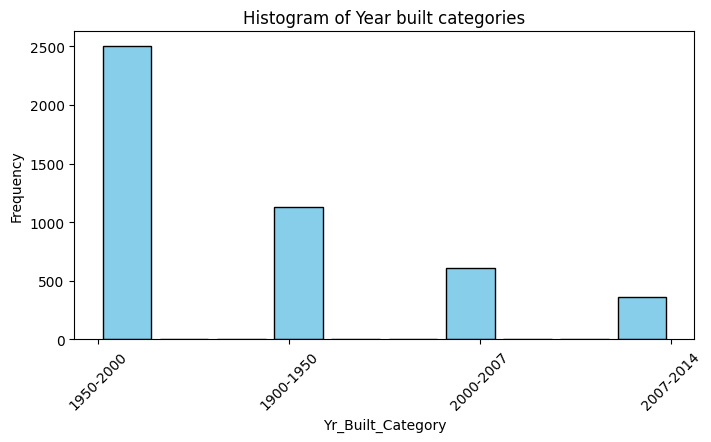

In [11]:
# Create a histogram for the "Yr_Built_Category" column

plt.figure(figsize=(8,4))
plt.hist(df['Yr_Built_Category'], color='skyblue', edgecolor='black', rwidth=0.85)
plt.xlabel('Yr_Built_Category')
plt.ylabel('Frequency')
plt.title('Histogram of Year built categories')
plt.xticks(rotation=45)
plt.show()

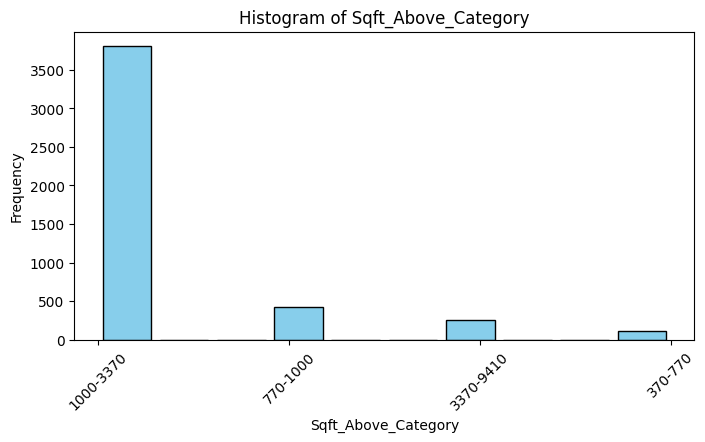

In [12]:
# Create a histogram for the "Sqft_Above_Category" column

plt.figure(figsize=(8,4))
plt.hist(df['Sqft_Above_Category'], color='skyblue', edgecolor='black', rwidth=0.85)
plt.xlabel('Sqft_Above_Category')
plt.ylabel('Frequency')
plt.title('Histogram of Sqft_Above_Category')
plt.xticks(rotation=45)
plt.show()

#Finding the outliers in Price feature

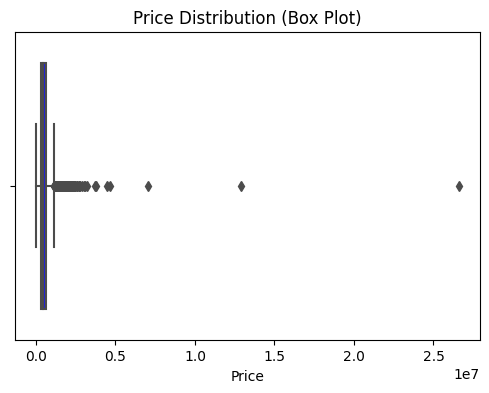

In [13]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['price'], color='blue')
plt.xlabel('Price')
plt.title('Price Distribution (Box Plot)')
plt.show()

INFERENCE ⛳

*In the above boxplot of Price, there are no much outliers above Q3+1.5×IQR and the median is inclined to the lower range which means that the the prices have comparatively more lower values.*

#Check Multicollinearity in Numerical features after normalizing

In [14]:
#Selecting the features which has numerical datatypes
num_attr=df.select_dtypes(include=['int','float']).columns
num_attr

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [15]:
#Selecting the features which has non numerical datatypes
cat_attr=df.select_dtypes(include=['object']).columns
cat_attr

Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')

In [16]:
corr_matrix=df.corr()
corr_matrix

<ipython-input-16-381c0cdd9e51>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


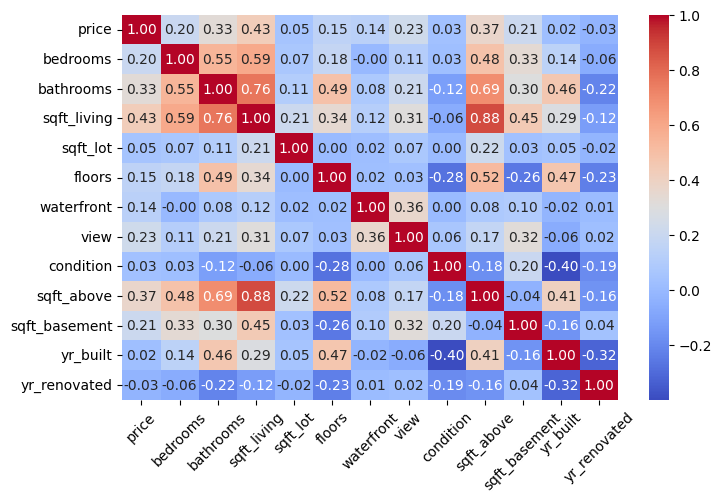

In [17]:
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='0.2f')
plt.title=("Correlation Matrix")
plt.xticks(rotation=45)
plt.show()

From the above heatmap, we can understand that
1. no of bedrooms, bathrooms and sq.ft of living is positively correlated i.e., as no of bedrooms and bathrooms increases, price increases
2. sqft_living and sqft_above are positively correlated
3. yr_renovated and condition are negatively correlated with yr_built i.e., as the year of renovation of the building gets more recent, the condition also gets better

#Understanding the correlation between numerical features and target variable 'Price'

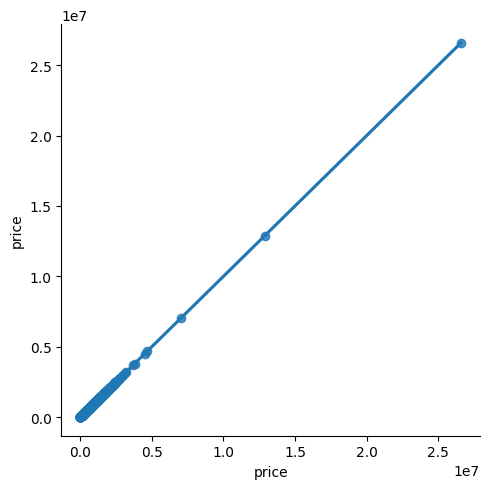

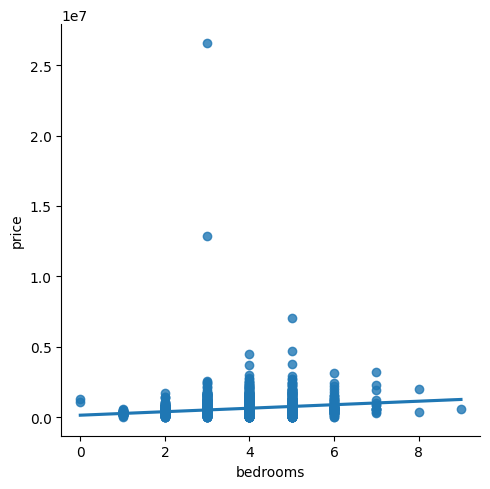

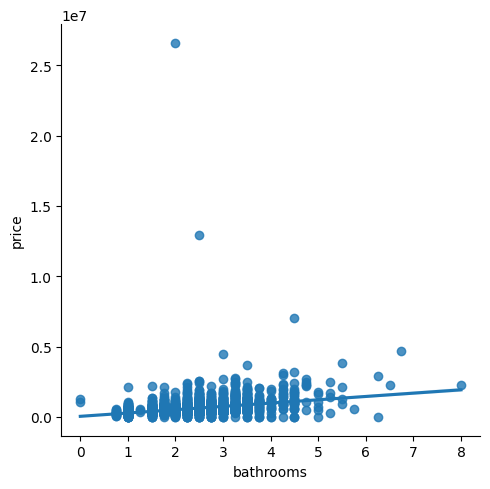

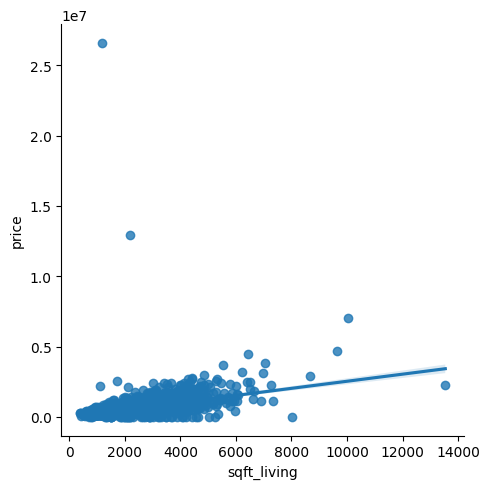

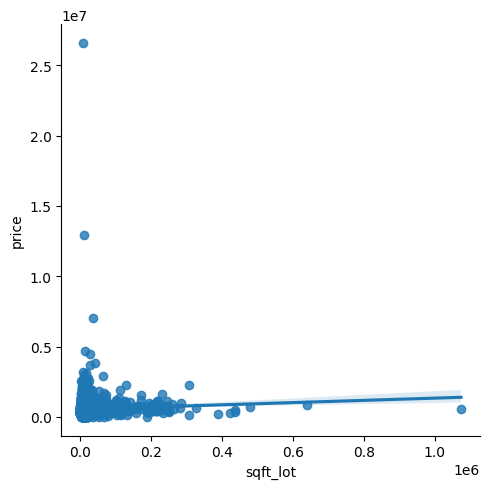

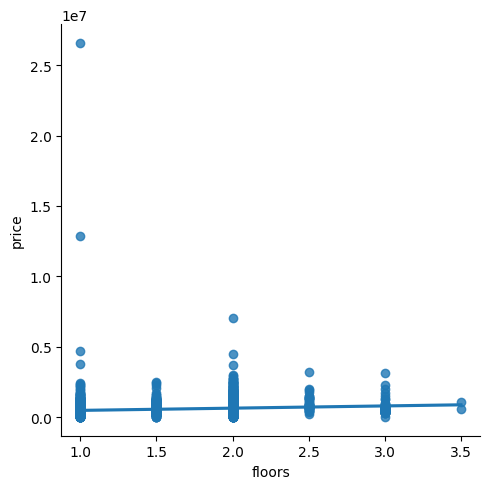

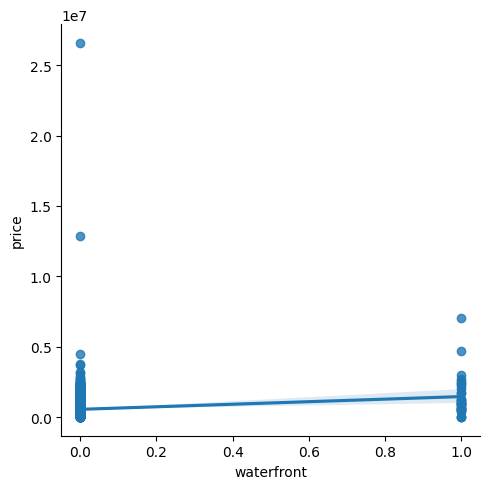

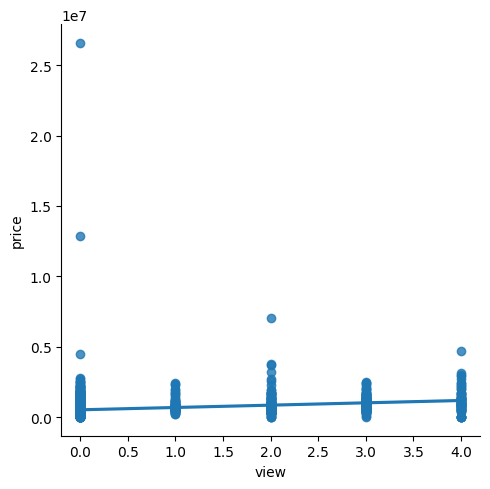

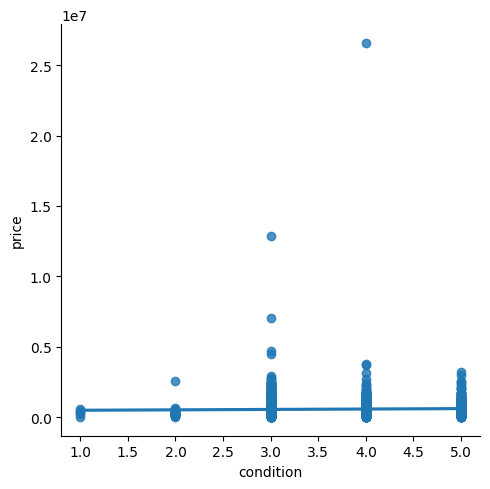

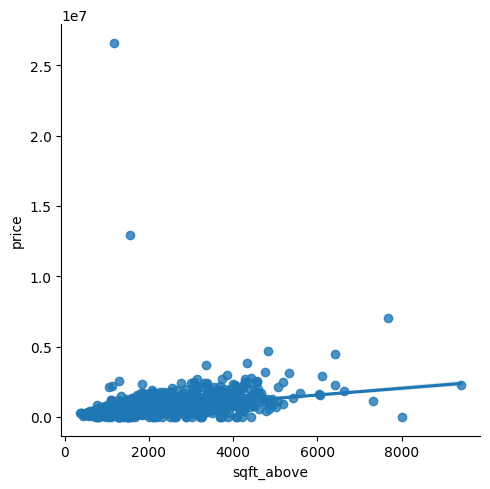

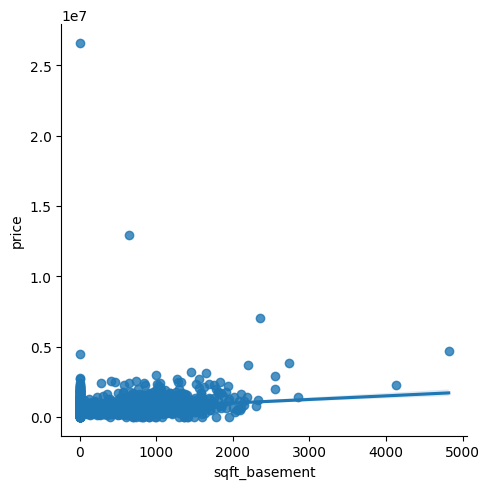

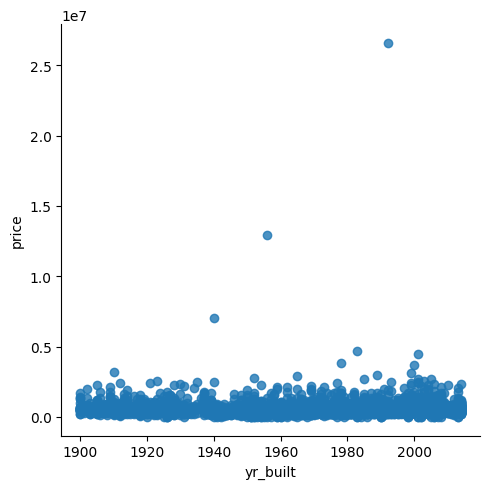

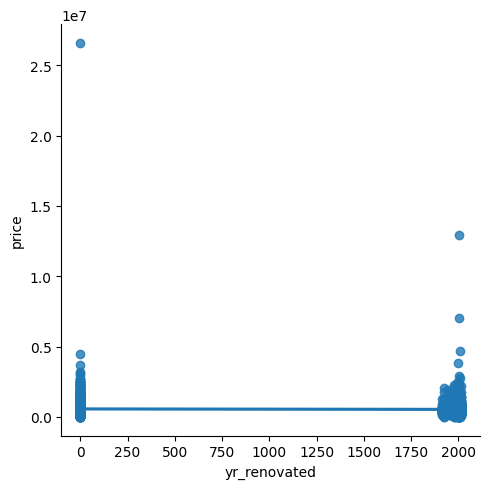

In [18]:
#Plotting lm graphs to understand the correlation between numerical features and target variable Price
for i in num_attr:
    sns.lmplot(x = i, y ='price',data=df)

INFERENCE

From the above lm plots, we can understand that sqft_above,sqft_living has high impact on the price of the houses i.e., as the sqft_living and sqft_above increases price decreases

**APPLYING MIN MAX NORMALIZATION**

In [19]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
min_data=scaler.fit_transform(df[num_attr])
min_data
# Create a new DataFrame with the normalized values
norm_df = pd.DataFrame(min_data, columns=num_attr)

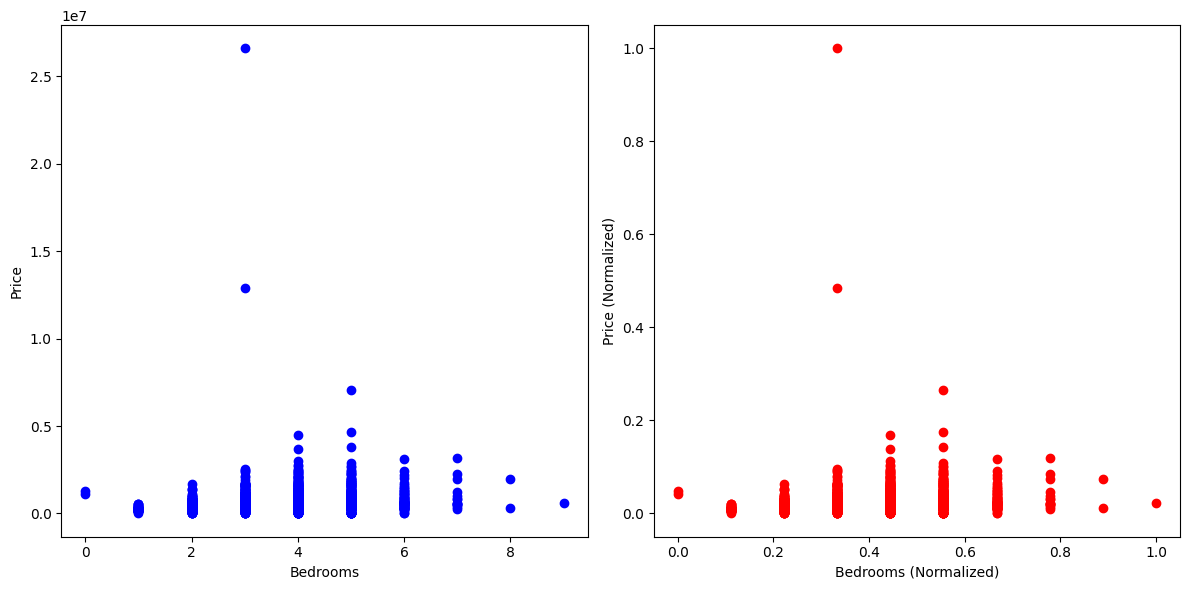

In [20]:
# Visualize the original and normalized data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['bedrooms'], df['price'], c='blue')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
plt.scatter(norm_df['bedrooms'], norm_df['price'], c='red')
plt.xlabel('Bedrooms (Normalized)')
plt.ylabel('Price (Normalized)')

plt.tight_layout()
plt.show()

**APPLYING Z SCORE NORMALISATION**

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
stand_data=scaler.fit_transform(df[num_attr])
stand_data

#Create a new dataframe with standardized values
stand_data=pd.DataFrame(stand_data, columns=num_attr)

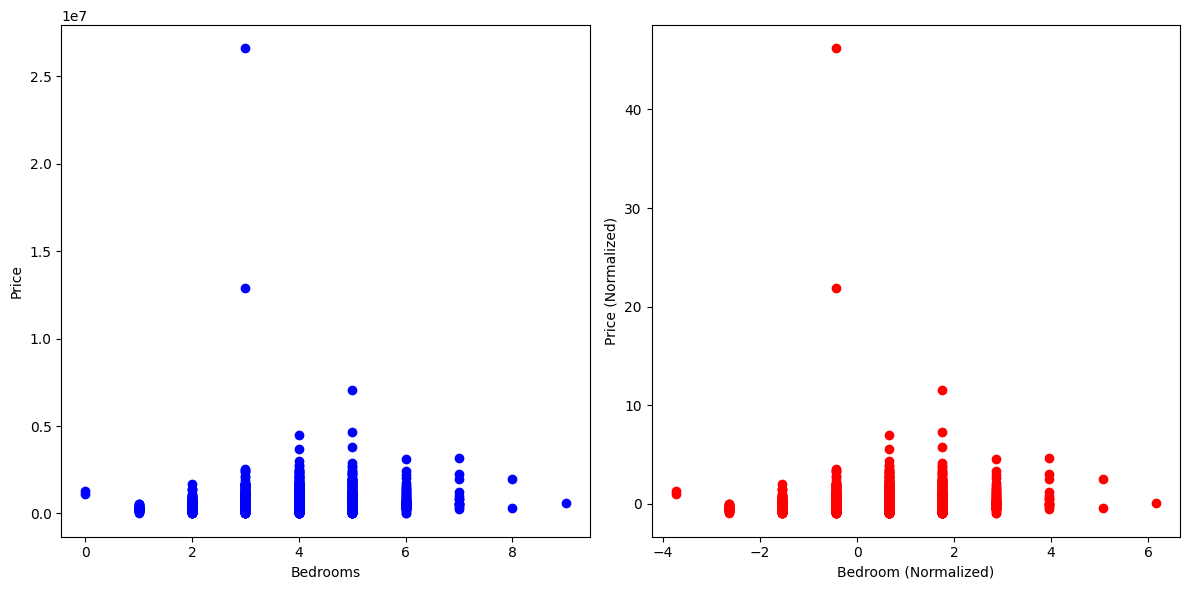

In [22]:
# Visualize the original and normalized data for selected columns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['bedrooms'], df['price'], c='blue')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
plt.scatter(stand_data['bedrooms'], stand_data['price'], c='red')
plt.xlabel('Bedroom (Normalized)')
plt.ylabel('Price (Normalized)')

plt.tight_layout()
plt.show()